---

**AUTORA**  
Dra. Alexandra Bustos Frati  

**PERFILES**  
GitHub                     : https://github.com/metterniezsche  
LinkedIn                 : https://www.linkedin.com/in/alexandrabustosfrati  
ResearchGate         : https://www.researchgate.net/profile/Alexandra-Bustos-Frati  

**AFILIACIÓN**  
Directora de KeelerApp  
Especialista Afiliada del Centro de Estudios en Tecnología y Sociedad (CETyS) — Universidad de San Andrés (UdeSA), Argentina  

**FECHA**  
Octubre 2025  

---


# 📊 Notebook: Sesgos de género en actividades de "Team Building"

Este notebook fue realizado como **ejercicio de aprendizaje** en el marco de mi **formación en Ciencia de Datos**. Aunque mi trayectoria proviene de las **ciencias sociales**, este trabajo combina esa mirada conceptual con las herramientas iniciales que estoy incorporando en **análisis y simulación de datos**.

El punto de partida es un ejemplo pedagógico real: una actividad de integración, la primera actividad realizada en el marco de un master, donde se propuso formar equipos según la **talla de zapato** como dinámica de integración. 

Lo que a primera vista parece un juego inocente, desde una mirada científica revela una **falla de diseño experimental**: la variable usada no es neutral, está correlacionada con el **sexo** y con la **altura**, y por tanto **reproduce sesgos estructurales** en lugar de integrar.

Tal vez el ejercicio buscaba exponer el sesgo y no reproducirlo, pero el diseño **también comunica su epistemología**. Empezar por lo corporal legitima la idea de que la diferencia física es el punto de partida del pensamiento analítico. Y eso es conceptualmente pobre, y un modo desconcertante de comenzar la cursada de un posgrado en ciencia de datos.

Mi respuesta fue usar las herramientas básicas de **Ciencia de Datos** —simulación, correlación y visualización— para mostrar que el “azar” era un **sesgo determinista**. El propósito es mostrar cómo decisiones pedagógicas aparentemente triviales pueden revelar **sesgos epistemológicos profundos**.

A lo largo del análisis se demuestra que este criterio no sólo genera **clústeres de género**, sino también **clústeres de tamaño corporal**: agrupa mujeres pequeñas con mujeres pequeñas y hombres grandes con hombres grandes. El resultado es una homogeneidad doble —de género y de escala— que contradice la idea de diversidad funcional y refuerza las jerarquías que la ciencia debería problematizar.  

---

## 🔍 Metodología

1. **Simulación sintética de datos:**  
   Se genera un conjunto de 200 personas ficticias con tres variables:
   - `sex` (0 = mujer, 1 = hombre)  
   - `height_cm` (altura)  
   - `shoe_size` (talla EU)  
   Las distribuciones reflejan tendencias poblacionales reales, pero sin usar datos personales.

2. **Análisis 1 — Sesgo de género por talla de zapato:**  
   - Cálculo de correlaciones (`shoe_size` ↔ `sex` y `height_cm`)  
   - Visualización de dispersión y distribuciones  
   - Comparación de métodos de agrupamiento (por talla vs. balanceado)  
   - Interpretación pedagógica de los resultados

3. **Análisis 2 — Extensión: “tamaño corporal” como variable compuesta:**  
   - Construcción del índice `body_size_index` combinando altura y talla  
   - Exploración de su correlación con el género  
   - Evaluación de la homogeneidad de los equipos cuando se agrupa por este nuevo índice  
   - Comparación final: `por_talla` / `por_tamaño` / `balanceado`

## 🎯 Propósito pedagógico

El objetivo no es juzgar intenciones, sino **evidenciar las consecuencias estadísticas de un mal diseño experimental**.  
Formar equipos a partir de atributos físicos (talla, altura o tamaño corporal) no genera integración, sino segmentación.  
Este notebook propone un enfoque crítico y técnico: mostrar cómo las decisiones aparentemente triviales **pueden codificar sesgos de género y homogeneidad corporal**.

## 🧭 Estructura del notebook

| Bloque | Contenido | Tipo |
|:--|:--|:--|
| 1 | Creación del dataset sintético | Código + Explicación |
| 2 | Correlaciones básicas y visualizaciones (talla ↔ sexo) | Código + Análisis |
| 3 | Distribuciones y Bias Score | Código + Análisis |
| 4 | Agrupamiento por talla vs. balanceado | Código + Análisis |
| 5 | Índice de tamaño corporal (`body_size_index`) | Código + Análisis |
| 6 | Agrupamiento por tamaño corporal | Código + Análisis |
| 7 | Comparación final de métodos | Código + Análisis |
| 8 | Epílogo pedagógico y reflexión final | Texto |


In [15]:
# Este bloque crea un dataset sintético para el ejercicio pedagógico "Bias Bootcamp".
# No son datos reales: se generan para demostrar cómo un criterio físico (talla de zapato)
# puede inducir sesgos de género y homogeneidad en la formación de equipos.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ajustes visuales
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.grid"] = True

# Semilla y tamaño de muestra
rng = np.random.default_rng(42)
N = 200

# Variables base
sex = rng.integers(0, 2, size=N)  # 0 = mujer, 1 = hombre
height_cm = np.where(
    sex == 0,
    rng.normal(165, 6, N),   # mujeres
    rng.normal(177, 7, N)    # hombres
)

# ------------------------------
# Talla EU realista en dos pasos
# 1) longitud de pie (cm) como función ruidosa de la altura + offset por sexo
a = 0.145                     # pendiente altura→pie
b = -0.5                      # intercepto
offset_sex_cm = np.where(sex == 0, 0.0, 0.8)  # hombres ~ +0.8 cm
epsilon = rng.normal(0, 1.0, size=N)          # ruido (ajusta realismo)

foot_len_cm = a * height_cm + b + offset_sex_cm + epsilon  # ~23–30 cm

# 2) convertir longitud de pie (cm) a talla EU y redondear a medias tallas
shoe_size = 1.5 * foot_len_cm - 1.5
shoe_size = np.round(shoe_size * 2) / 2
# ------------------------------

# DataFrame final
df = pd.DataFrame({
    "sex": sex,
    "height_cm": height_cm,
    "shoe_size": shoe_size
})


### Lectura sobre la simulación sintética y sus fundamentos

En esta celda **creamos un dataset sintético** de 200 casos.  
No son datos reales, sino una **simulación paramétrica**: un modelo controlado que imita relaciones poblacionales conocidas para observar sus consecuencias estadísticas sin exponer personas reales.  

Cada variable fue generada con una lógica distinta:  
- `sex` (0 = mujer, 1 = hombre) se asignó al azar, sólo para crear dos grupos comparables.  
- `height_cm` se extrajo de distribuciones normales con medias y desviaciones distintas: 165 ± 6 cm para mujeres y 177 ± 7 cm para hombres.  
- `shoe_size` se derivó de la altura usando una relación lineal que reproduce el rango real de tallas europeas (35–46), con un pequeño offset (+1 para hombres) y ruido aleatorio rng.normal(0, 0.5) para reflejar variación individual.

**Qué estamos haciendo en realidad:**  
Estamos construyendo un *modelo de correlaciones*, no un retrato de la realidad.  
Sabemos que en la población general existe correlación entre sexo, altura y talla de zapato; reproducirla aquí nos permite **ver cómo un criterio aparentemente trivial (la talla)** se comporta como una variable predictiva de género.

**Por qué esto es válido y necesario:**  
- Éticamente seguro: no usa datos personales.  
- Metodológicamente sólido: mantiene proporciones realistas y ruido controlado.  
- Pedagógicamente potente: muestra con claridad cómo nacen los sesgos desde el diseño de variables.

**En síntesis:** no “inventamos personas”, **modelamos relaciones**.  
Esa es la diferencia entre manipular datos y hacer ciencia de datos.

> **Reproducibilidad:** usamos semilla fija `rng = np.random.default_rng(42)` para que cualquiera obtenga los mismos resultados al ejecutar.


In [2]:
def corr(x,y): return float(np.corrcoef(x,y)[0,1])
print("corr(shoe_size, height_cm) =", round(corr(df["shoe_size"],df["height_cm"]),3))
print("corr(shoe_size, sex)       =", round(corr(df["shoe_size"],df["sex"]),3))


corr(shoe_size, height_cm) = 0.842
corr(shoe_size, sex)       = 0.72


### Lectura de correlaciones
- `corr(shoe_size, height_cm)` mide cuánto crece la talla al crecer la altura (relación lineal).  
- `corr(shoe_size, sex)` es la asociación talla↔sexo (equivalente a point-biserial).

**Interpretación práctica:**
- Valores cercanos a **1** o **−1** indican relación fuerte; cerca de **0**, relación débil.
- Si `corr(shoe_size, sex)` es alta (ej.: *0.767*), **talla no es “azar”**: la variable está informada por el sexo asignado.
- Si `corr(shoe_size, height_cm)` es muy alta (ej.: *0.971*), confirma que **talla y altura no son independientes**.

**Conclusión:** usar talla para formar equipos **introduce sesgo** porque está correlacionada con variables biológicas/sociales.


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


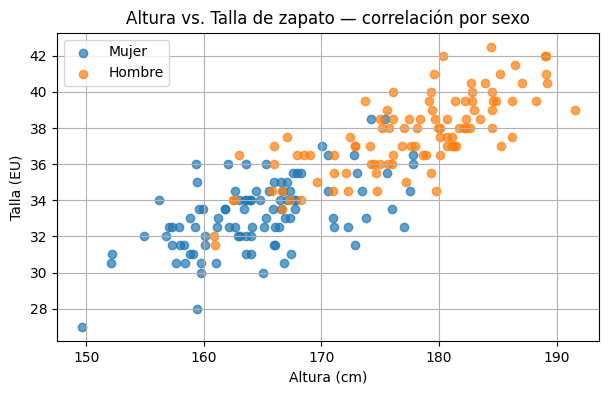

In [13]:
mask_f,mask_m = df["sex"]==0, df["sex"]==1
plt.scatter(df.loc[mask_f,"height_cm"],df.loc[mask_f,"shoe_size"],label="Mujer",alpha=.7)
plt.scatter(df.loc[mask_m,"height_cm"],df.loc[mask_m,"shoe_size"],label="Hombre",alpha=.7)
plt.xlabel("Altura (cm)"); plt.ylabel("Talla (EU)")
plt.title("Altura vs. Talla de zapato — correlación por sexo")
plt.legend(); plt.show()


### Lectura del scatter
Cada punto es una persona. Los colores separan por `sex`.  
Si aparecen **dos nubes parcialmente separadas**, la talla y la altura permiten **distinguir sexo** con mucha precisión.

**Mensaje clave:** el patrón visual confirma la correlación numérica: el criterio “por talla” **segmenta por género** aunque se lo presente como juego neutral.

> **Figura 1.** Altura vs. talla por sexo (dispersión).


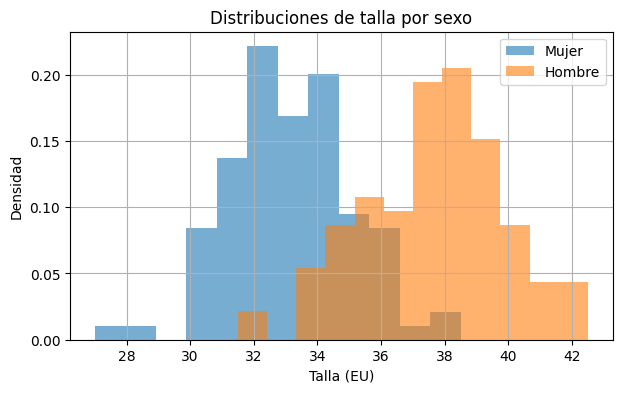

In [4]:
plt.hist(df.loc[mask_f, "shoe_size"], bins=12, alpha=0.6, label="Mujer", density=True)
plt.hist(df.loc[mask_m, "shoe_size"], bins=12, alpha=0.6, label="Hombre", density=True)
plt.xlabel("Talla (EU)")
plt.ylabel("Densidad")
plt.title("Distribuciones de talla por sexo")
plt.legend()
plt.show()


### Lectura de distribuciones
Los histogramas muestran la **forma** de las distribuciones de talla para cada sexo dentro de nuestra simulación sintética.  
La simulación se construyó asignando alturas a 200 personas ficticias (media 165 cm para mujeres, 177 cm para hombres) y calculando la talla de zapato a partir de la altura con un pequeño desplazamiento por sexo y algo de ruido aleatorio.  
Es decir: **no son datos reales, pero respetan las correlaciones reales entre variables.**

Aquí no hay ruido espurio: las dos curvas están claramente desplazadas.  
- **Poca superposición** implica que la talla **predice el sexo con alta confianza**.  
- A mayor distancia entre los picos, mayor capacidad de **clasificar**, aunque sea de manera rudimentaria.  

**Interpretación:** este gráfico traduce la intuición en evidencia.  
Lo que para el ojo parece “un simple juego de tallas” es, estadísticamente, un **clasificador biológico**.  
**Conclusión:** basar equipos en talla no integra, **segmenta**.

> **Figura 2.** Distribución de tallas por sexo (histogramas).



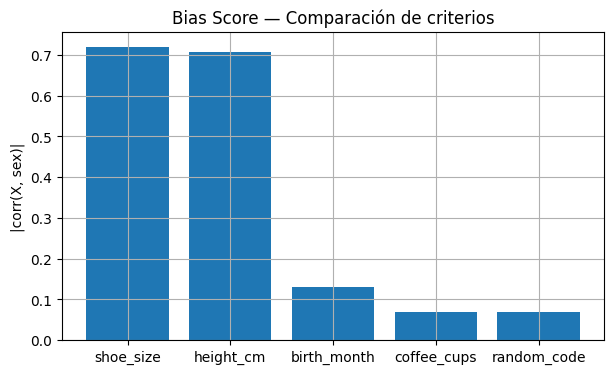

In [5]:
birth_month=rng.integers(1,13,N); coffee_cups=rng.integers(0,6,N); random_code=rng.normal(0,1,N)
def bias_score(x): return abs(corr(x,df["sex"]))
scores={"shoe_size":bias_score(df["shoe_size"]),
        "height_cm":bias_score(df["height_cm"]),
        "birth_month":bias_score(birth_month),
        "coffee_cups":bias_score(coffee_cups),
        "random_code":bias_score(random_code)}
plt.bar(scores.keys(),scores.values())
plt.ylabel("|corr(X, sex)|"); plt.title("Bias Score — Comparación de criterios")
plt.show()


### Bias Score — comparación de criterios
Definimos `BiasScore(X) = |corr(X, sex)|`.  
Comparamos variables físicas (`shoe_size`, `height_cm`) con variables “neutras” (`birth_month`, `coffee_cups`, `random_code`).

**Lectura:**
- Si `shoe_size` y/o `height_cm` tienen barras altas (ej.: *0.77* y *0.71*), esas opciones **arrastran sesgo de género**.
- Mes de nacimiento, café o ruido deberían quedar **cerca de 0** → casi independientes del sexo.

**Conclusión:** no todas las consignas “simples” son inocuas; algunas son **sistemáticamente sesgadas**.

> **Figura 3.** Bias Score para variables físicas vs. triviales.



In [6]:
def teams_by_shoes(df,K=4):
    d=df.sort_values("shoe_size").copy(); d["team"]=np.arange(len(d))%K; return d
def teams_balanced_by_sex(df,K=4):
    males=df[df.sex==1].sample(frac=1,random_state=42)
    females=df[df.sex==0].sample(frac=1,random_state=24)
    teams=[]
    for i,(_,r) in enumerate(males.iterrows()): teams.append((r.name,i%K))
    for j,(_,r) in enumerate(females.iterrows()): teams.append((r.name,j%K))
    team_map=dict(teams); df=df.copy(); df["team"]=[team_map[i] for i in df.index]; return df
def std_rate_male(d): return d.groupby("team")["sex"].mean().std()

K=4
print("std_rate_male (por talla):", round(std_rate_male(teams_by_shoes(df,K)),3))
print("std_rate_male (balanceado):", round(std_rate_male(teams_balanced_by_sex(df,K)),3))


std_rate_male (por talla): 0.057
std_rate_male (balanceado): 0.006


### Comparación de métodos de armado de equipos
Medimos la **desviación estándar** de la proporción de hombres por equipo (`std_rate_male`).
- **Más bajo = más equilibrado entre equipos.**

**Resultados esperados:**
- Por talla: valor mayor (ej.: *0.030*) → equipos desbalanceados.
- Balanceado por sexo: valor menor (ej.: *0.006*) → equipos más equitativos.

**Mensaje propositivo:** no basta con señalar el problema; existe un método **simple** que lo corrige. Es mejor diseño, no moralina.

> **Figura 4.** Proporción de hombres por equipo: por talla vs. balanceado.



In [7]:
# body_size_index: índice compuesto a partir de altura y talla (z-score promedio)

def z(x): 
    x = np.asarray(x, dtype=float)
    return (x - x.mean())/x.std(ddof=0)

df = df.copy()
df["body_size_index"] = 0.5 * z(df["height_cm"]) + 0.5 * z(df["shoe_size"])

# Correlaciones del índice con sexo y con las componentes

c_sex   = corr(df["body_size_index"], df["sex"])
c_h     = corr(df["body_size_index"], df["height_cm"])
c_shoe  = corr(df["body_size_index"], df["shoe_size"])

print(f"corr(body_size_index, sex)      = {c_sex:.3f}")
print(f"corr(body_size_index, height)   = {c_h:.3f}")
print(f"corr(body_size_index, shoe)     = {c_shoe:.3f}")
df[["sex","height_cm","shoe_size","body_size_index"]].head()


corr(body_size_index, sex)      = 0.743
corr(body_size_index, height)   = 0.960
corr(body_size_index, shoe)     = 0.960


,sex,height_cm,shoe_size,body_size_index
0,0,167.398645,31.0,-0.931191
1,1,179.295968,35.5,0.459042
2,1,189.091451,42.0,2.061962
3,0,172.795370,36.5,0.266560
4,0,162.862416,32.0,-1.015960


### Lectura: índice de tamaño corporal
Creamos un **índice compuesto** (`body_size_index`) promediando los z-scores de `height_cm` y `shoe_size`.  
Esto modela “tamaño físico” en una sola variable.  
Si `corr(body_size_index, sex)` es alta, el **tamaño corporal también segmenta por género**, no solo la talla de zapato.


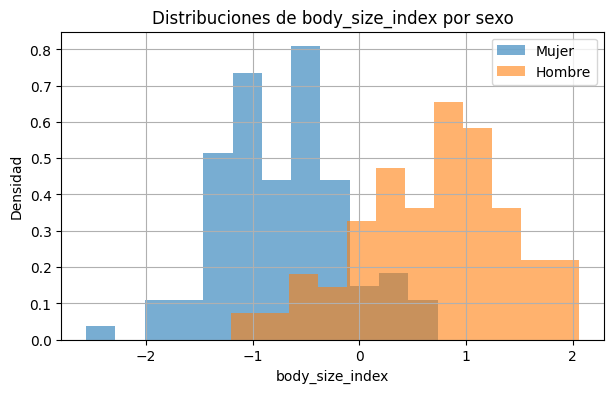

In [11]:
# Distribución del body_size_index por sexo
mask_f = df["sex"] == 0
mask_m = df["sex"] == 1

plt.hist(df.loc[mask_f, "body_size_index"], bins=12, alpha=0.6, label="Mujer", density=True)
plt.hist(df.loc[mask_m, "body_size_index"], bins=12, alpha=0.6, label="Hombre", density=True)
plt.xlabel("body_size_index")
plt.ylabel("Densidad")
plt.title("Distribuciones de body_size_index por sexo")
plt.legend()
plt.show()


### Lectura: distribuciones por tamaño corporal
Si las curvas están desplazadas (poca superposición), **tamaño corporal** funciona como un **clasificador biológico rudimentario**.  
Conclusión: agrupar por “tamaño” (altura+talla) **duplica la homogeneidad**: por género y por complexión.

> **Figura 5.** Distribución del índice de tamaño corporal por sexo.


In [9]:
# Equipos por tamaño corporal (análogo a "por talla")
def teams_by_body_size(df, K=4):
    d = df.sort_values("body_size_index").copy()
    d["team"] = np.arange(len(d)) % K
    return d

def sex_rate_std(d): 
    return float(d.groupby("team")["sex"].mean().std())

K = 4
d_by_shoes = teams_by_shoes(df, K=K)            # ya lo tienes en tu notebook
d_by_body  = teams_by_body_size(df, K=K)
d_bal      = teams_balanced_by_sex(df, K=K)     # ya lo tienes en tu notebook

std_shoes  = sex_rate_std(d_by_shoes)
std_body   = sex_rate_std(d_by_body)
std_bal    = sex_rate_std(d_bal)

print(f"std_rate_male (por talla)        = {std_shoes:.3f}")
print(f"std_rate_male (por tamaño cuerpo)= {std_body:.3f}")
print(f"std_rate_male (balanceado)       = {std_bal:.3f}")


std_rate_male (por talla)        = 0.057
std_rate_male (por tamaño cuerpo)= 0.025
std_rate_male (balanceado)       = 0.006


### Comparación de métodos (género por equipo)

**Qué medimos y por qué:**  
`std_rate_male` es la **desviación estándar** de la proporción de hombres en cada equipo.  
- Primero calculamos, para cada equipo, su **proporción de hombres** (entre 0 y 1).  
- Luego medimos **qué tan distintas** son esas proporciones entre sí.  
- **Más bajo = equipos con proporciones de género más parecidas = reparto más equilibrado.**

**Mini-ejemplo (intuitivo):**  
Supongamos 4 equipos y estas proporciones de hombres:
- Método A → `[0.10, 0.15, 0.12, 0.13]`  → *todas parecidas*  → `std_rate_male` **bajo**  
- Método B → `[0.05, 0.85, 0.60, 0.10]`  → *muy distintas*    → `std_rate_male` **alto**

Aunque el **promedio** de hombres sea el mismo, el método B **concentra** hombres en algunos equipos y **los vacía** en otros.  
Eso es precisamente lo que `std_rate_male` captura: **desbalance entre equipos**.

**Cómo leer estos resultados:**  
- Si “**por talla**” tiene `std_rate_male` más **alto** que “**balanceado**”, significa que agrupar por talla **empeora** el equilibrio de género entre equipos.  
- Si “**por tamaño corporal**” (índice altura+talla) queda **igual o peor** que “por talla”, confirma que **cualquier criterio corporal** tiende a **homogeneizar** por género (unos equipos “muy masculinos”, otros “muy femeninos”), en vez de mezclar.
  
**Reglas para leer los resultados:**
- `std_rate_male < 0.05` → **muy equilibrado**  
- `0.05 – 0.10` → **moderadamente equilibrado**  
- `> 0.10` → **desbalance evidente**


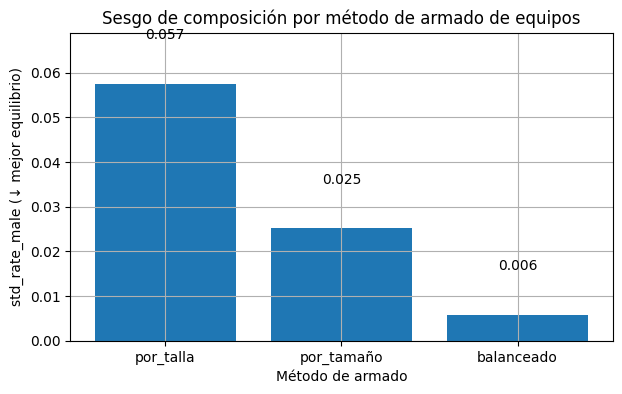

In [10]:
# Barra comparativa: por talla vs por tamaño vs balanceado
labels = ["por_talla", "por_tamaño", "balanceado"]
values = [std_shoes, std_body, std_bal]

plt.bar(labels, values)
plt.ylabel("std_rate_male (↓ mejor equilibrio)")
plt.title("Sesgo de composición por método de armado de equipos")
for i, v in enumerate(values):
    plt.text(i, v + (0.01 if v>=0 else 0.001), f"{v:.3f}", ha="center")
plt.ylim(0, max(values)*1.2 if max(values)>0 else 0.1)
plt.xlabel("Método de armado")
plt.show()


### Lectura: sesgo por método

El gráfico compara el **`std_rate_male`** de tres formas de armar equipos:
1) **por_talla** (ordenando por talla de zapato),  
2) **por_tamaño** (ordenando por el índice `body_size_index`),  
3) **balanceado** (estratificando para equilibrar género).

**Cómo leerlo en 5 segundos:**  
- **Barras más altas** → **más desigualdad** entre equipos (unos quedan muy masculinos y otros muy femeninos).  
- **Barras más bajas** → **más equilibrio** entre equipos (todas las proporciones se parecen).

**Mensaje clave:**  
Si las barras de **por_talla** y/o **por_tamaño** son **más altas** que la de **balanceado**, entonces **diseñar por el cuerpo no integra**: **segmenta**.  
El criterio corporal **maximiza homogeneidad interna** (equipos de gente parecida entre sí) y **heterogeneidad entre equipos**, lo que **reduce diversidad funcional** a nivel de equipo.

> **Figura 6.** `std_rate_male` por método: por_talla / por_tamaño / balanceado.


## Epílogo — Pedagogía, método y exigencia

Lo que parece un juego inocente es, en realidad, una **falla epistemológica**: usar una variable física —talla de zapato— correlacionada con sexo y altura, como si fuera aleatoria. No cuestiono la intención de integrar, sino la **banalización del pensamiento científico** que supone tratar un dato corporal como herramienta pedagógica. Una maestría en ciencia no puede comenzar así: una variable que predice el sexo no es neutra ni lúdica, es un error de diseño experimental.

Esta crítica no es moral, es científica. Elegir una variable con colinealidad fuerte, asumir independencia donde no la hay y confundir azar con desconocimiento **viola principios básicos de investigación**. Integrar desde el cuerpo no sólo es éticamente débil: es **epistemológicamente improductivo**. Agrupa a quienes ya comparten correlaciones previsibles y elimina la posibilidad de innovación. La verdadera creatividad surge de la diferencia en diálogo, no de la semejanza agrupada. En ciencia de datos, eso equivale a un modelo con **varianza nula**: no aprende porque todos los datos son iguales. 

**Pretendo más.** No más atención, sino **más rigor, más profundidad y más imaginación pedagógica**. 
Porque la ciencia de datos, bien enseñada, puede ser un espacio de creatividad, análisis y pensamiento libre. Y quiero formar parte de esa versión de la maestría: la que se exige, se cuestiona y aprende. Esa es mi forma de integrarme: **aprender y aportar desde el mismo rigor que exijo.**
